# Agenda to be done
- Loading the libraries
- Loading the dataset
- Exploring or analysing the data
- Data Cleaning part (if any)
- Data Vizualisation
- Word Cloud

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
data = pd.read_csv('/content/netflix.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# shape of the data
data.shape

(8807, 12)

In [5]:
# display all the columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#
data.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# checking the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Null values

In [8]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
# make a copy of the original data
df = data.copy()

In [10]:
df.shape

(8807, 12)

Drop the null values

In [11]:
df = df.dropna()

In [12]:
# recheck the shape opf the data after removing the missing values
df.shape

(5332, 12)

# Cleaning task 1 -- change the datatype of 'date_added' column  object to dattime

In [13]:
df['date_added'].dtype

dtype('O')

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [16]:
df['date_added'].info()

<class 'pandas.core.series.Series'>
Index: 5332 entries, 7 to 8806
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
5328 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 83.3 KB


Task - 2 --- craete a new column having only the added years

In [19]:
df[['date_added']].head()

,date_added
7,2021-09-24
8,2021-09-24
9,2021-09-24
12,2021-09-23
24,2021-09-21


In [20]:
df['year_added'] = df['date_added'].dt.year

In [21]:
df[['year_added']].head()

,year_added
7,2021.0
8,2021.0
9,2021.0
12,2021.0
24,2021.0


In [23]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,4
release_year,0
rating,0
duration,0


In [24]:
df = df.dropna()

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# the year is not in the proper datatype , convert from float to integer
df[['year_added']] = df[['year_added']].astype('int')

In [28]:
df[['year_added']].head()

,year_added
7,2021
8,2021
9,2021
12,2021
24,2021


In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021


Now we have completed our data cleaning, we can make the analysis

In [30]:
# count the number of moovies and TV shows
df.type.value_counts()

,count
type,
Movie,5185
TV Show,143


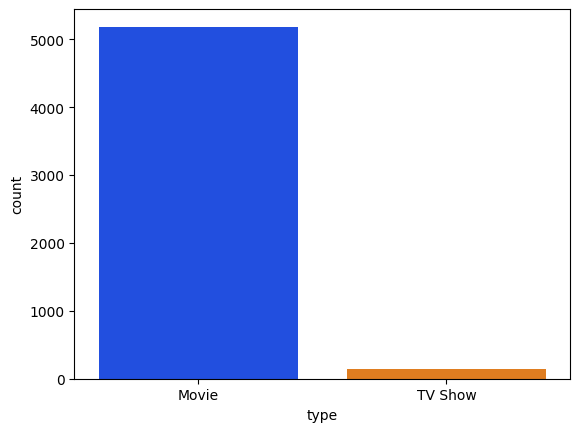

In [32]:
# visualize the same details
sns.countplot(x = df['type'], palette = 'bright')
plt.show()

# Question 1 - Display the moovies and TV shows which was added in 2021 ?

# Question 2 - Display the moovies which was added in 2020 and the country is USA ?